In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

Full dataset description can be found here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

#  Attribute                     Domain
-- -----------------------------------------
1. Sample code number:           id number
2. Clump Thickness:              1 - 10
3. Uniformity of Cell Size:      1 - 10
4. Uniformity of Cell Shape:     1 - 10
5. Marginal Adhesion:            1 - 10
6. Single Epithelial Cell Size:  1 - 10
7. Bare Nuclei:                  1 - 10
8. Bland Chromatin:              1 - 10
9. Normal Nucleoli:              1 - 10
10. Mitoses:                     1 - 10
11. Class:                       (2 for benign, 4 for malignant)

In [6]:
names = ['thickness', 'UO cell size', 'UO cell shape', 'adhesion', 'SE cell size',
        'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class']
df = pd.read_csv('breast-cancer.csv', names=names, delimiter=',')
df.head()

,thickness,UO cell size,UO cell shape,adhesion,SE cell size,nuclei,chromatin,nucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
print(df.shape)
print(df.dtypes) # strings in 6th column

(699, 10)
thickness         int64
UO cell size      int64
UO cell shape     int64
adhesion          int64
SE cell size      int64
nuclei           object
chromatin         int64
nucleoli          int64
mitoses           int64
class             int64
dtype: object


In [8]:
df[df['nuclei'] == '?']

,thickness,UO cell size,UO cell shape,adhesion,SE cell size,nuclei,chromatin,nucleoli,mitoses,class
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2
563649,8,8,8,1,2,?,6,10,1,4


In [9]:
filtered = df.loc[df['nuclei'] != '?'] # getting rid of troublesome parameter :P
print(filtered.shape)
filtered = filtered.astype(int)
filtered.dtypes

(683, 10)


thickness        int64
UO cell size     int64
UO cell shape    int64
adhesion         int64
SE cell size     int64
nuclei           int64
chromatin        int64
nucleoli         int64
mitoses          int64
class            int64
dtype: object

In [10]:
filtered.iloc[:, :9].head()

,thickness,UO cell size,UO cell shape,adhesion,SE cell size,nuclei,chromatin,nucleoli,mitoses
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1


In [ ]:
def knn(samples, labels, n_neighbours):
    
    
    for sample, label in zip(samples, labels):
        
        

In [122]:
scaled = StandardScaler().fit_transform(filtered.iloc[:, :9].values)
scaled

/home/mateusz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mateusz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [123]:
pca = PCA(n_components=2)
comp = pca.fit_transform(scaled)
comp_df = pd.DataFrame(data=comp, columns=['principal component 1', 'principal component 2'])
comp_df.head()

,principal component 1,principal component 2
0,-1.470171,-0.104273
1,1.442046,-0.570141
2,-1.592478,-0.076120
3,1.479812,-0.528452
4,-1.344862,-0.090719


In [124]:
comp_df['Class'] = components['class'].values
comp_df.head()

,principal component 1,principal component 2,Class
0,-1.470171,-0.104273,2
1,1.442046,-0.570141,2
2,-1.592478,-0.076120,2
3,1.479812,-0.528452,2
4,-1.344862,-0.090719,2


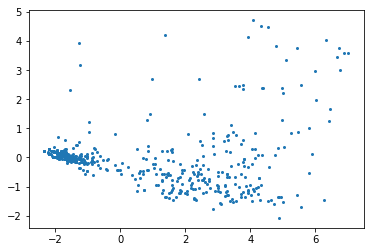

In [127]:
plt.scatter(comp_df.iloc[:, 0], comp_df.iloc[:, 1], s=4)

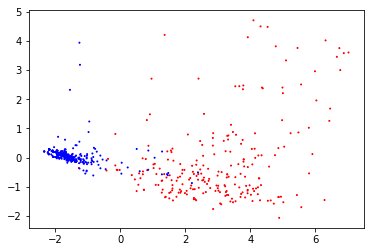

In [128]:
colors = ['blue' if cl == 2 else 'red' for cl in comp_df['Class']]
plt.scatter(comp_df.iloc[:, 0], comp_df.iloc[:, 1], c=colors, s=1)

In [1]:
kpca = KernelPCA(kernel="rbf", n_components=2)
comp2 = kpca.fit_transform(scaled)
comp_df2 = pd.DataFrame(data=comp2, columns=['principal component 1', 'principal component 2'])
comp_df2.head()

NameError: name 'KernelPCA' is not defined

In [142]:
comp_df2['class'] = components['class'].values
comp_df2.head()

,principal component 1,principal component 2,class
0,-0.324448,-0.279847,2
1,0.532380,-0.165591,2
2,-0.384024,-0.029997,2
3,0.531882,-0.151138,2
4,-0.322221,-0.177062,2


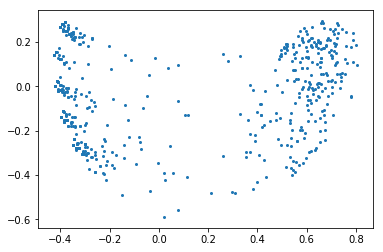

In [143]:
plt.scatter(comp_df2.iloc[:, 0], comp_df2.iloc[:, 1], s=4)

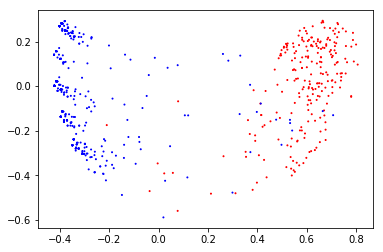

In [145]:
colors = ['blue' if cl == 2 else 'red' for cl in comp_df2['class']]
plt.scatter(comp_df2.iloc[:, 0], comp_df2.iloc[:, 1], c=colors, s=1)

<IPython.core.display.Javascript object>


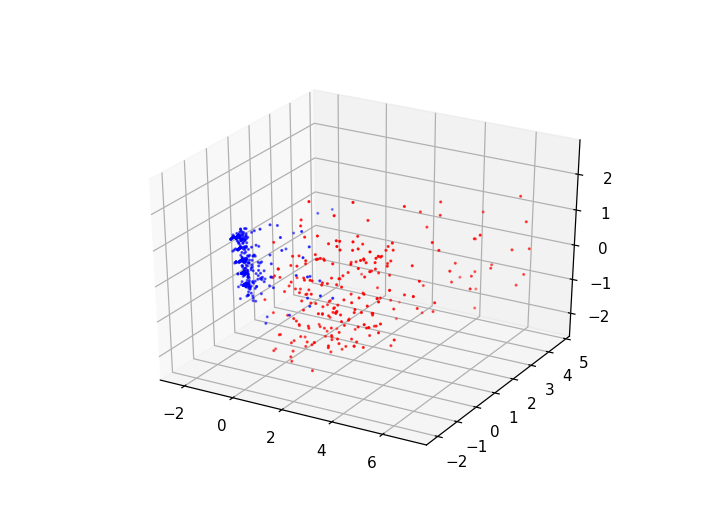

In [154]:
%matplotlib notebook



pca = PCA(n_components=3)
comp = pca.fit_transform(scaled)
comp_df = pd.DataFrame(data=comp, columns=['pc1', 'pc2', 'pc3'])

ax = plt.axes(projection='3d')
ax.scatter3D(comp_df.iloc[:, 0], comp_df.iloc[:, 1], comp_df.iloc[:, 2], c=colors, s=1);

<IPython.core.display.Javascript object>


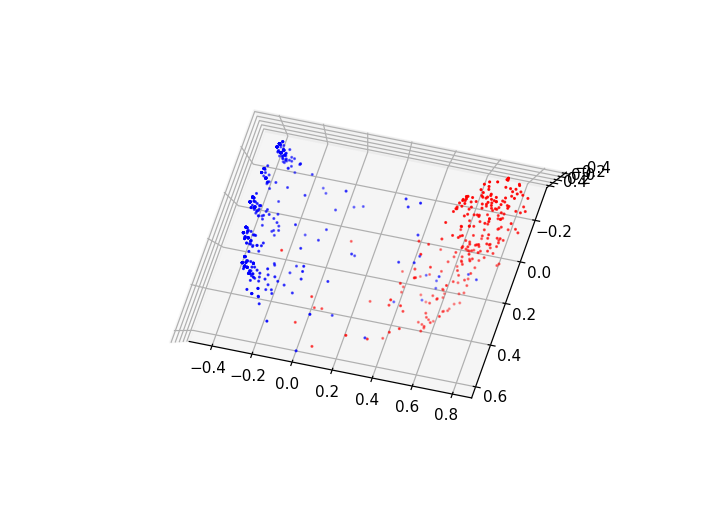

In [155]:
%matplotlib notebook

kpca = KernelPCA(kernel="rbf", n_components=3)
comp2 = kpca.fit_transform(scaled)
comp_df2 = pd.DataFrame(data=comp2, columns=['pc1', 'pc2', 'pc3'])

ax = plt.axes(projection='3d')
ax.scatter3D(comp_df2.iloc[:, 0], comp_df2.iloc[:, 1], comp_df2.iloc[:, 2], c=colors, s=1);